# Homework 6

In [1]:
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

## Problem 1

Problem 1: Radioactive decay chain
The isotope 213 Bi decays to stable 209 Bi via one of two different routes, with probabilities and
half-lives given in this diagram:
Pb209
3.3 min
Tl209
Bi213
46 min
2.2 min
2.09%
97.91%
Bi209
(Technically, 209 Bi isn’t really stable, but it has a half-life of more than 10 19 years, a billion times
the age of the universe, so it might as well be.)
Starting with a sample consisting of 10 000 atoms of 213 Bi, simulate the decay of the atoms
by dividing time into slices of length dt = 1 s each and on each step doing the following:
1. For each atom of 209 Pb in turn, decide at random, with the appropriate probability, whether
it decays or not. (The probability can be calculated from Newman’s Eq. 10.3). Count the
total number that decay, subtract it from the number of 209 Pb atoms, and add it to the
number of 209 Bi atoms.
2. Now do the same for 209 Tl, except that decaying atoms are subtracted from the total for
209 Tl and added to the total for 209 Pb.
3. For 213 Bi the situation is more complicated: when a 213 Bi atom decays you have to de-
cide at random with the appropriate probability the route by which it decays. Count the
numbers that decay by each route and add and subtract accordingly.
Note that you have to work up the chain from the bottom like this, not down from the top, to
avoid inadvertently making the same atom decay twice on a single step.
Keep track of the number of atoms of each of the four isotopes at all times for 20 000 sec-
onds and make a single graph showing the four numbers as a function of time on the same axes

1. For each atom of 209 Pb in turn, decide at random, with the appropriate probability, whether
it decays or not. (The probability can be calculated from Newman’s Eq. 10.3). Count the
total number that decay, subtract it from the number of 209 Pb atoms, and add it to the
number of 209 Bi atoms.


10.3.1:

$p(t) = 1 - 2^{-t/ \tau}$

In [182]:
#starting with onlt 10,000 Pb atoms
Nbi = 0
Npb = 10000
#one second time step
h = 1
#hl for bi [s]
tau = 46*60
p = 1 - 2**(-1*h/tau)
#making time steps, increasing by an order of magnitude to display behavior
tpoints = np.arange(0.0,10000.0,h)

In [183]:
pbs = []
bis = []

for t in tpoints:
    pbs.append(Npb)
    bis.append(Nbi)
    #Generate a randum number for each atom and decide if it decays based on the value of that number
    decay = 0
    for i in range(Npb):
        r = np.random.random()
        if r<p:
            decay += 1
    Npb -= decay
    Nbi += decay

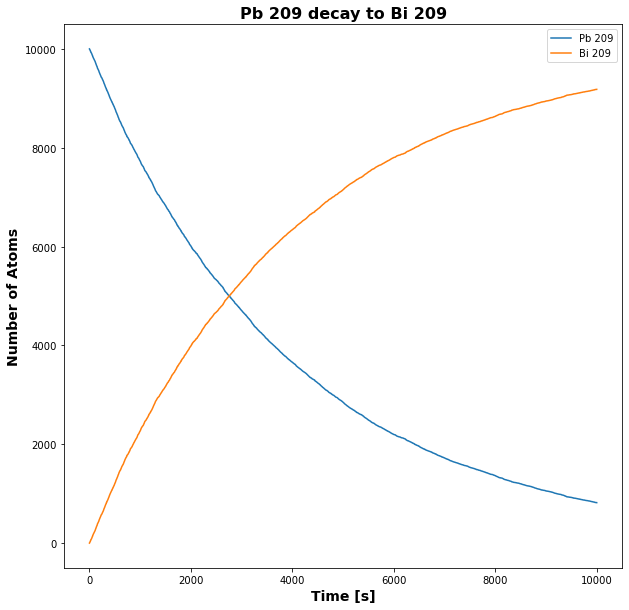

In [184]:
plt.plot(tpoints, pbs, label = 'Pb 209')
plt.plot(tpoints, bis, label = 'Bi 209')
plt.legend()
plt.title('Pb 209 decay to Bi 209')
plt.xlabel('Time [s]')
plt.ylabel('Number of Atoms');

2. Now do the same for 209 Tl, except that decaying atoms are subtracted from the total for
209 Tl and added to the total for 209 Pb.


In [54]:
#starting with onlt 10,000 Bi atoms
Npb = 0
Ntl = 10000
#one second time step
h = 1
#hl for bi [s]
tau = 2.2*60
p = 1 - 2**(-1*h/tau)
#making time steps
tpoints = np.arange(0.0,1000.0,h)

In [55]:
pbs2 = []
tls = []

for t in tpoints:
    pbs2.append(Npb)
    tls.append(Ntl)
    #Generate a randum number for each atom and decide if it decays based on the value of that number
    decay = 0
    for i in range(Ntl):
        r = np.random.random()
        if r<p:
            decay += 1
    Ntl -= decay
    Npb += decay

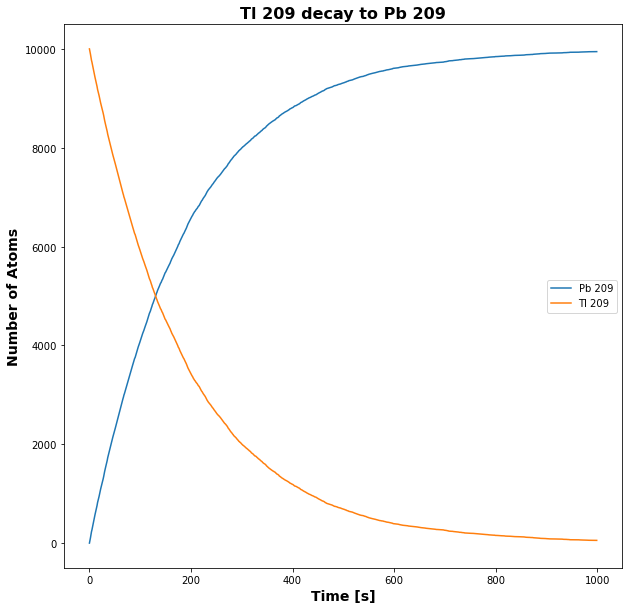

In [57]:
plt.plot(tpoints, pbs2, label = 'Pb 209')
plt.plot(tpoints, tls, label = 'Tl 209')
plt.legend()
plt.title('Tl 209 decay to Pb 209')
plt.xlabel('Time [s]')
plt.ylabel('Number of Atoms');

3. For 213 Bi the situation is more complicated: when a 213 Bi atom decays you have to de-
cide at random with the appropriate probability the route by which it decays. Count the
numbers that decay by each route and add and subtract accordingly.
Note that you have to work up the chain from the bottom like this, not down from the top, to
avoid inadvertently making the same atom decay twice on a single step.
Keep track of the number of atoms of each of the four isotopes at all times for 20 000 sec-
onds and make a single graph showing the four numbers as a function of time on the same axes

In [178]:
#starting with onlt 10,000 Bi atoms
Ntl = 0
Npb = 0
Nbi209 = 0
Nbi = 10000
#one second time step
h = 1
#apropriate probabilities
ppb = 97.91/100
ptl = 2.09/100

#hl for bi [s]
tau = 46*60
p = 1 - 2**(-1*h/tau)

tpb = 3.3*60
ttl = 2.2*60

ppb = 1 - 2**(-1*h/tpb)
ptl = 1 - 2**(-1*h/ttl)
#making time steps, increased by an order of magnitude from the other problems
tpoints = np.arange(0.0,10000.0,h)

In [179]:
pbs3 = []
tls3 = []
bis3 = []
bis3_209 = []

for t in tpoints:
    pbs3.append(Npb)
    tls3.append(Ntl)
    bis3.append(Nbi)
    bis3_209.append(Nbi209)
    #Generate a randum number for each atom and decide if it decays based on the value of that number
    decaypb = 0
    decaytl = 0
    
    for i in range(Npb):
        r = np.random.random()
        if r<ppb:
            Npb -=1
            Nbi209 +=1
            
    for i in range(Ntl):
        r = np.random.random()
        if r<ptl:
            Ntl -=1
            Npb +=1
            
    for i in range(Nbi):
        r = np.random.random()
        if r<p:
            r2 = np.random.random()
            if (2.02/100)<r2<(97.91/100):
               # decayp += 1
                Npb+=1
                Nbi-=1
            elif r2<(2.02/100):
                #decaytl+=1
                Ntl+=1
                Nbi-=1
            
   # Nbi -= (decayp+decaytl)
   # Npb += decayp
   # Ntl += decaytl

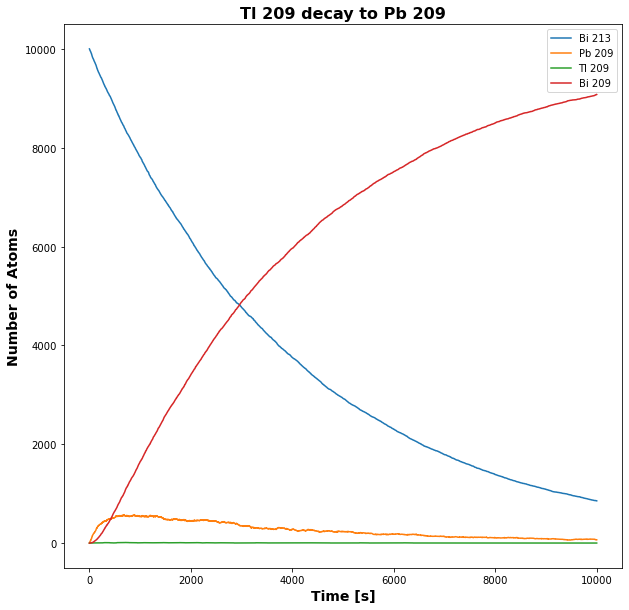

In [180]:
plt.plot(tpoints, bis3, label = 'Bi 213')
plt.plot(tpoints, pbs3, label = 'Pb 209')
plt.plot(tpoints, tls3, label = 'Tl 209')
plt.plot(tpoints, bis3_209, label = 'Bi 209')
plt.legend()
plt.title('Tl 209 decay to Pb 209')
plt.xlabel('Time [s]')
plt.ylabel('Number of Atoms');

# Problem 2

Problem 2: Volume of a hypersphere
This exercise asks you to estimate the volume of a sphere of unit radius in ten dimensions using
a Monte Carlo method. Consider the equivalent problem in two dimensions, the area of a circle
of unit radius:
1
+1
+1−1
−1
y
x
The area of the circle, the shaded area above, is given by the integral
I =
Z Z + 1
Problem 2: Volume of a hypersphere
This exercise asks you to estimate the volume of a sphere of unit radius in ten dimensions using
a Monte Carlo method. Consider the equivalent problem in two dimensions, the area of a circle
of unit radius:
1
+1
+1−1
−1
y
x
The area of the circle, the shaded area above, is given by the integral
I =
Z Z + 1


First, the 2-d case:

In [ ]:
#from class: our monte carlo mean-value:

for N in [1000, 10000, 100000, 1000000, 10000000]:
    x = xmax * rng.random(size=N)
    f_avg = np.sum(f(x)) / N
    I = (xmax - xmin)*f_avg
    print(N, I)

In [70]:
def f(x,y):
    if x**2 +y**2 <=1:
        return 1.0
    else:
        return 0.0

In [108]:
#Adapting for 2-d:

xmin = ymin = 0.0
xmax = ymax = 1.0

rng = np.random.default_rng(seed=23434)

for N in [1000, 10000, 100000, 1000000, 10000000]:
    x = xmax * rng.random(size=N)
    y = ymax * rng.random(size=N)
    f_avg = 0
    for i in range(len(x)):
        f_avg += (f(x[i],y[i]) / N)
    
    Ix = (xmax - xmin)*f_avg
    Iy = (ymax - ymin)*f_avg
    I = Ix*Iy
    print(N, I)

1000 0.6256810000000009
10000 0.6141856899998903
100000 0.6187395599985133
1000000 0.6166929488067396
10000000 0.6170449693732738
100000000 0.6169061932511948


In [155]:
true = (4/3)*np.pi*(1/2)**3
print(f'The calculated volume of a 2-D sphere is {I} while the true volume is {true}.\nThis took {N} integrations.')

The calculated volume of a 2-D sphere is 0.6169061932511948 while the true volume is 0.5235987755982988.
This took 100000000 integrations.


Generalizing to 10-D

In [188]:
rng = np.random.default_rng(seed=23434)
N = 10000000
for i in np.arange(1,11):
   # if i == 1:
        
    imin = np.repeat(0.0, i)
    imax = np.repeat(1.0, i)
    
    vals = np.repeat(imax * rng.random(size=N))
    f_avg = 0
    #f = 0
    for i in range(len(vals[0])):
        f = 0
        for v in vals:
            f+= 

IndentationError: expected an indented block (<ipython-input-188-2306fc764591>, line 12)

# Problem 3

Problem 3: The Ising model
The Ising model is a theoretical model of a magnet. The magnetization of a magnetic material
is made up of the combination of many small magnetic dipoles spread throughout the material.
If these dipoles point in random directions then the overall magnetization of the system will
be close to zero, but if they line up so that all or most of them point in the same direction then
the system can acquire a macroscopic magnetic moment—it becomes magnetized. The Ising
model is a model of this process in which the individual moments are represented by dipoles
or “spins” arranged on a grid or lattice:
2
In this case we are using a square lattice in two dimensions, although the model can be defined
in principle for any lattice in any number of dimensions.
The spins themselves, in this simple model, are restricted to point in only two directions,
up and down. Mathematically the spins are represented by variables s i = ± 1 on the points of
the lattice, + 1 for up-pointing spins and 

1. First write a function to calculate the total energy of the system, as given by the equation
above. That is, for a given array of values of the spins, go through every pair of adjacent
spins and add up the contributions s i s j from all of them, then multiply by 

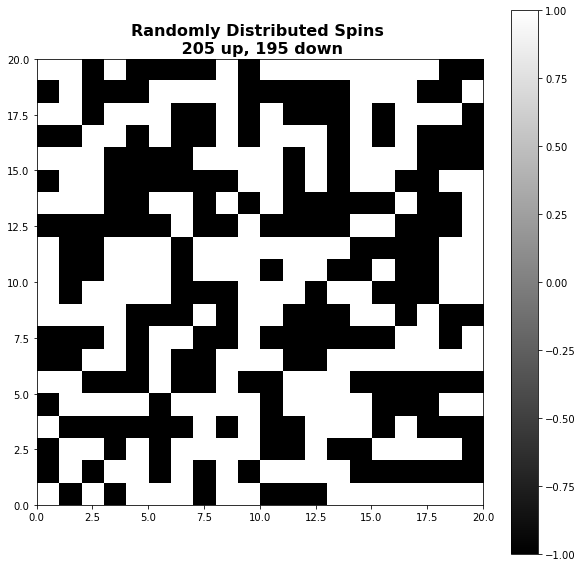

In [150]:
xspan = yspan = range(0,20)
matrix = np.zeros([20,20],int)

up = 0
down = 0

for xi, x in enumerate(xspan):
    for yi, y in enumerate(yspan):
        r = np.random.random()
        if r<0.50:
            matrix[xi,yi]+=1
            up+=1
        else:
            matrix[xi,yi]-=1
            down+=1
plt.imshow(matrix, extent = [0,20,0,20], cmap = 'gray')
plt.title(f'Randomly Distributed Spins \n {up} up, {down} down')
plt.colorbar();

In [144]:
def get_E(xspan, yspan, matrix):
    J = 1.0
    E = 0
    for xi, x in enumerate(xspan):
        for yi, y in enumerate(yspan):
            si = matrix[xi-1, yi]
            sj = matrix[xi, yi]
            E+= si*sj
    return -1.0*J*E

In [145]:
get_E(xspan, yspan, matrix)

24.0

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model
with J = 1 and temperature T = 1 in units where the Boltzmann constant k B is also 1.
Initially set the spin variables randomly to ± 1, so that on average about a half of them
are up and a half down, giving a total magnetization of roughly zero. Then choose a
spin at random, flip it, and calculate the new energy after it is flipped, and hence also
the change in energy as a result of the flip. Then decide whether to accept the flip using
the Metropolis acceptance formula, Newman’s Eq. 10.60. If the move is rejected you will
have to flip the spin back to where it was. Otherwise you keep the flipped spin. Now
repeat this process for many moves

3. Make a plot of the total magnetization M = Â i s i of the system as a function of time for a
million Monte Carlo steps. You should see that the system develops a “spontaneous mag-
netization,” a nonzero value of the overall magnetization. Hint: While you are working
on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have
it working properly, do a longer run of a million steps to get the final results

4. Run your program several times and observe the sign of the magnetization that develops,
positive or negative. Describe what you find and give a brief explanation of what is hap-
pening. Then run it two further times at temperatures T = 2 and T = 3. Explain briefly
what you see. How does the behavior of the system change as temperature is increased